<a href="https://colab.research.google.com/github/sgalrot/auto-tel/blob/main/AutoTel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Setup matplotlib to output figures into the notebook
%matplotlib inline

## Set some default values of the the matplotlib plots
plt.rcParams['figure.figsize'] = (6.0, 6.0)  # Set default plot's sizes
plt.rcParams['figure.dpi'] = 120  # Set default plot's dpi (increase fonts' size)
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

### Loading the dataset

In [2]:
dataset_location = 'https://opendata.tel-aviv.gov.il//AutoTelReservations/202107_AutoTel.csv'

## Loading the data
dataset = pd.read_csv(dataset_location, parse_dates=['startDate', 'endDate', 'tripActualStart', 'tripActualEnd'])
## Drop nans
dataset.dropna(inplace=True)
# dataset_mizdamen = dataset[dataset['pricePlan']=='מזדמן דיגיתל FREE']

In [3]:
y_field = 'tripTimeAmount'
y_field2 = 'tripDistanceUsed'
x_fields = ['tripActualStart', 'startLatitude', 'startLongitude', 'endLatitude', 'endLongitude', 'tripDistanceUsed']

In [4]:
dataset

,reservationId,startDate,endDate,tripActualStart,tripActualEnd,tripTimeAmount,tripDistanceUsed,reservationDate,cancellationDate,carId,reservationStatus,pricePlanId,pricePlan,startLatitude,startLongitude,endLatitude,endLongitude
0,1978214,2021-07-01 00:04:00,2021-07-01 00:09:00,2021-07-01 00:09:00,2021-07-01 00:29:00,1191.0,13.0,07/01/2021 00:04:00,01/01/2001 00:00:00,51.0,Ended,6.0,מזדמן דיגיתל FREE,32.06575,34.77698,32.12774,34.83341
1,1978215,2021-07-01 00:05:00,2021-07-01 00:05:00,2021-07-01 00:05:00,2021-07-01 00:24:00,1140.0,10.0,07/01/2021 00:05:00,01/01/2001 00:00:00,314.0,Ended,7.0,מתמיד FREE,32.06166,34.80570,32.11881,34.82722
2,1978216,2021-07-01 00:06:00,2021-07-01 00:11:00,2021-07-01 00:11:00,2021-07-01 00:29:00,1062.0,9.0,07/01/2021 00:06:00,01/01/2001 00:00:00,345.0,Ended,5.0,מזדמן FREE,32.10728,34.83423,32.09031,34.77792
3,1978217,2021-07-01 00:08:00,2021-07-01 00:08:00,2021-07-01 00:08:00,2021-07-01 00:18:00,595.0,0.0,07/01/2021 00:08:00,01/01/2001 00:00:00,52.0,Ended,0.0,מסלול אוטותל המקורי,32.07608,34.77655,32.07607,34.77649
4,1978218,2021-07-01 00:08:00,2021-07-01 00:17:00,2021-07-01 00:17:00,2021-07-01 00:49:00,1929.0,2.0,07/01/2021 00:08:00,01/01/2001 00:00:00,202.0,Ended,0.0,מסלול אוטותל המקורי,32.06709,34.77243,32.06484,34.77072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47528,2037914,2021-07-31 23:53:00,2021-08-01 00:00:00,2021-08-01 00:00:00,2021-08-01 00:14:00,808.0,6.0,07/31/2021 23:53:00,01/01/2001 00:00:00,157.0,Ended,1.0,מסלול מתמיד אוטותל,32.06974,34.79133,32.10717,34.80241
47529,2037915,2021-07-31 23:54:00,2021-07-31 23:54:00,2021-07-31 23:54:00,2021-08-01 00:22:00,1672.0,9.0,07/31/2021 23:54:00,01/01/2001 00:00:00,334.0,Ended,0.0,מסלול אוטותל המקורי,32.07636,34.78559,32.10559,34.81889
47530,2037917,2021-07-31 23:55:00,2021-07-31 23:58:00,2021-07-31 23:58:00,2021-08-01 00:09:00,712.0,3.0,07/31/2021 23:55:00,01/01/2001 00:00:00,156.0,Ended,8.0,מתמיד דיגיתל FREE,32.06734,34.77518,32.05684,34.76092
47531,2037918,2021-07-31 23:58:00,2021-08-01 00:06:00,2021-08-01 00:06:00,2021-08-01 00:15:00,526.0,3.0,07/31/2021 23:58:00,01/01/2001 00:00:00,37.0,Ended,7.0,מתמיד FREE,32.10233,34.82291,32.10900,34.80355


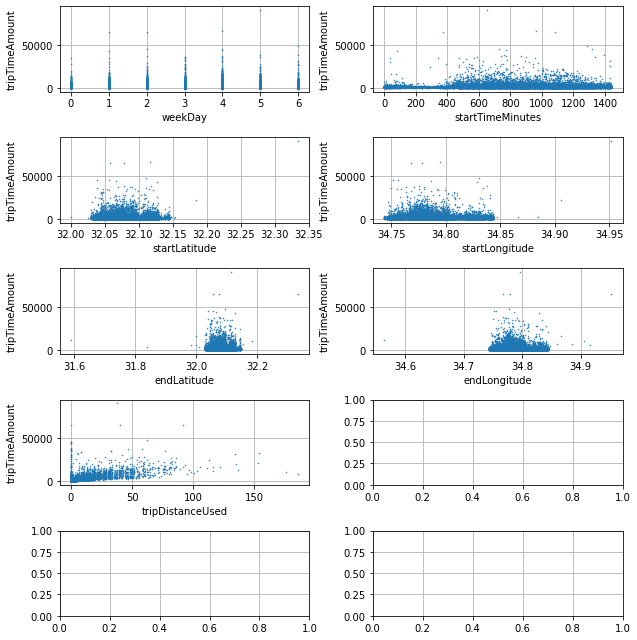

In [17]:
fig, axes = plt.subplots(5, 2, figsize=(9, 9))  # Create a figure with 3 over 3 axes
axes = axes.flatten()  # Convert the object storing the axes for a 3 by 3 array into a 1D array of lenth 9.
# Building processed functions extracted from the dataset
phi_x_fields = ['weekDay', 'startTimeMinutes', 'startLatitude', 'startLongitude', 'endLatitude', 'endLongitude', 'tripDistanceUsed']
# phi_x_fields = ['weekDay']

def build_phi_x_field(dataset, x_field='weekDay'):
  if x_field == 'weekDay':
    return np.array([date.weekday() for date in dataset['tripActualStart']])
  elif x_field == 'startTimeMinutes':
    return np.array([date.hour*60 + date.minute for date in dataset['tripActualStart']])
  else:
    return dataset[x_field]


for i_field, field in enumerate(phi_x_fields):
    ax = axes[i_field]
    ax.plot(build_phi_x_field(dataset, field), dataset[y_field].values, '.', markersize=1)
    ax.set_xlabel(field)
    ax.set_ylabel(y_field)
fig.tight_layout()   

## Train-test split

Before we start building our model we shall first divide the dataset into 80% train and 20% test.

**Note**: we will use the name train_full to indicate the train set before splitting it into train and validation.

In [8]:
n_samples = len(dataset)  # The total number of samples in the dataset

## Generate a random generator with a fixed seed
rand_gen = np.random.RandomState(0)

## Generating a shuffled vector of indices
indices = np.arange(n_samples)
rand_gen.shuffle(indices)

## Split the indices into 80% train (full) / 20% test
n_samples_train_full = int(n_samples * 0.8)
train_full_indices = indices[:n_samples_train_full]
test_indices = indices[n_samples_train_full:]

## Extract the sub datasets from the full dataset using the calculated indices
train_full_set = dataset.iloc[train_full_indices]
test_set = dataset.iloc[test_indices]

## Train - validation split

Since we plan to test different configuration of building our model we would like to further split the train set into 75% train and 25% validation set. (which will result in a 60%-20%-20% over all split).

In [9]:
## Generate a random generator with a fixed (different) seed
rand_gen = np.random.RandomState(1)

## Generating a shuffled vector of indices
indices = train_full_indices.copy()
rand_gen.shuffle(indices)

## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
## Split the indices of the train (full) dataset into 75% train / 25% validation
n_samples_train = int(n_samples_train_full * 0.75)
train_indices = train_full_indices[:n_samples_train]
val_indices = train_full_indices[n_samples_train:]
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

## Extract the sub datasets from the full dataset using the calculated indices
train_set = dataset.iloc[train_indices]
val_set = dataset.iloc[val_indices]

### Evaluation
- **Reminder**: the RMSE score is given by $\sqrt{\tfrac{1}{N}\sum_i (\hat{y}_i-y_i)^2}$

In [10]:
def calc_rmse(model, x, y):
    ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
    y_hat = model.predict(x)
    rmse = np.sqrt(1 / len(y) * (y - y_hat) @ (y - y_hat))
    ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
    return rmse

## Third order features

We try a third order polynomial of the fields in the dataset.

In [12]:
from sklearn.linear_model import LinearRegression

def extract_x_y(dataset):
    features = []
    ## Adding first order features
    for field in phi_x_fields:
        features.append(build_phi_x_field(dataset, field))
    ## Adding second order features
    for field1 in phi_x_fields:
       for field2 in phi_x_fields:
           features.append(build_phi_x_field(dataset, field1) * build_phi_x_field(dataset, field2))
    ## Adding third order features
    for field1 in phi_x_fields:
        for field2 in phi_x_fields:
            for field3 in phi_x_fields:
                features.append(build_phi_x_field(dataset, field1) * build_phi_x_field(dataset, field2) * build_phi_x_field(dataset, field3))
        ## Adding 4th order features
    # for field1 in phi_x_fields:
    #     for field2 in phi_x_fields:
    #         for field3 in phi_x_fields:
    #             for field4 in phi_x_fields:
    #                 features.append(build_phi_x_field(dataset, field4) * build_phi_x_field(dataset, field1) * build_phi_x_field(dataset, field2) * build_phi_x_field(dataset, field3))
    
    x = np.stack(features, axis=1)
    y = dataset[y_field]
    return x, y

x_train, y_train = extract_x_y(train_set)
x_val, y_val = extract_x_y(val_set)

model = LinearRegression(normalize=True)
model.fit(x_train, y_train)

print(f'The train score is: {calc_rmse(model, x_train, y_train):.2f}')
print(f'The validation score is: {calc_rmse(model, x_val, y_val):.2f}')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


The train score is: 1302.16
The validation score is: 1532.54


In [13]:
from sklearn.linear_model import Ridge

model = Ridge(normalize=True, alpha=0)
model.fit(x_train, y_train)

print(f'The train score is: {calc_rmse(model, x_train, y_train):.2f}')
print(f'The validation score is: {calc_rmse(model, x_val, y_val):.2f}')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


The train score is: 1608.65
The validation score is: 1796.07


In [14]:
## The list of lambdas to test
lambdas_list = [0.0001, 0.00001, 0.000001, 1e-8, 1e-12]

## We will use these two dictionaries to store the results for each lambda
train_scores = {}
val_scores = {}

for lambda_value in lambdas_list:
    model = Ridge(normalize=True, alpha=lambda_value)
    model.fit(x_train, y_train)
    
    train_scores[lambda_value] = calc_rmse(model, x_train, y_train)
    val_scores[lambda_value] = calc_rmse(model, x_val, y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

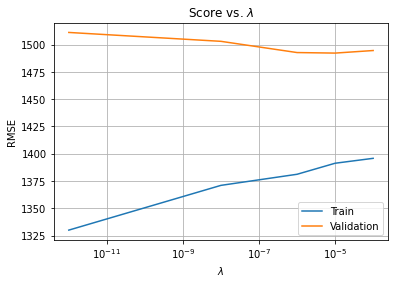

In [15]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.plot(list(train_scores.keys()), list(train_scores.values()), label='Train')
ax.plot(list(val_scores.keys()), list(val_scores.values()), label='Validation')
ax.set_ylabel('RMSE')
ax.set_xlabel('$\lambda$')
ax.set_title('Score vs. $\lambda$')
ax.legend();

In [16]:
from sklearn.linear_model import Lasso

model = Lasso(normalize=True, alpha=0.01, max_iter=10000)
model.fit(x_train, y_train)
    
print(f'The train score is: {calc_rmse(model, x_train, y_train):.2f}')
print(f'The validation score is: {calc_rmse(model, x_val, y_val):.2f}')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


The train score is: 1400.01
The validation score is: 1498.57
